<div style="text-align:center; font-size:29px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Lista 3
</div>

**Zadanie 1**


**Treść zadania:**
Rozwiąż (w pojedynczej precyzji) układ równań  
$$
A_{5×5}\vec{x} = \vec{b},
$$
gdzie $A_{5×5}$ to macierz Hilberta oraz $\vec{b} = (5, 4, 3, 2, 1)^T$. Skorzystaj z metody iteracyjnego poprawiania rozwiązań.

**Opis zadania:**

Celem jest zastosowanie metody iteracyjnego poprawiania rozwiązań w celu rozwiązania układu równań z macierzą Hilberta w pojedynczej precyzji. Warto uwzględnić kroki obliczeniowe oraz uzasadnienie wyboru tej metody w kontekście kondycjonowania macierzy Hilberta.


<div style="text-align:center; font-size:24px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Rozwiązanie
</div>

1. **Krok pierwszy**  
   Rozwiązujemy układ równań:  
   $$
   A \vec{x}^{(1)} = \vec{b}.
   $$

2. **Krok drugi**  
   Obliczamy wektor reszt:  
   $$
   \vec{r}^{(1)} = \vec{b} - A \vec{x}^{(1)}.
   $$

3. **Krok trzeci**  
    Jeśli spełniony jest jeden z poniższych warunków:

    $$
    \| \vec{r}^{(1)} \|_\infty \leq \| A \vec{x}^{(1)} \|_\infty u
    $$

    lub

    $$
    \| \vec{r}^{(1)} \|_\infty \leq \| \vec{b} \|_\infty u,
    $$

    gdzie \( u \) oznacza jednostkę maszynową, proces obliczeniowy można zakończyć.

    **W przeciwnym wypadku:**  
    należy przejść do kolejnego etapu iteracji.

4. **Krok czwarty**  
   Obliczamy:  
   $$
   \delta \vec{x}^{(1)},
   $$  
   i wyznaczamy:  
   $$
   \vec{x}^{(2)} = \vec{x}^{(1)} + \delta \vec{x}^{(1)}.
   $$

5. **Krok piąty**  
   Obliczamy:  
   $$
   \vec{r}^{(2)} = \vec{b} - A \vec{x}^{(2)},
   $$  
   i ponownie przechodzimy do punktu 3.

---

**Dla rozkładu LU definiujemy następujące trzy równania:**  

1.  
   $$
   L \cdot \vec{z} = \vec{y},
   $$  

2.  
   $$
   U \cdot \vec{x} = \vec{z},
   $$  

3.  
   $$
   \vec{r} = A \delta \vec{x}.
   $$  


In [9]:
import numpy as np
from scipy.linalg import hilbert, norm

In [10]:
#implementacja funkcji do ręcznego obliczenia rozkładu LU
def Lu(mat):
    mat = mat.astype(float)
    n = len(mat)  
    L, U = np.zeros((n, n)), np.zeros((n, n))

    # Główna pętla, iterujemy przez każdy wiersz (lub kolumnę, ponieważ macierz jest kwadratowa)
    for i in range(n):
        for k in range(i, n):
            sum_ = 0
            for j in range(i):
                sum_ += (L[i][j] * U[j][k])
            U[i][k] = mat[i][k] - sum_

        # Wyznaczamy wartości dla macierzy L (dolnotrójkątnej)
        for k in range(i, n):
            if i == k:
                L[i][i] = 1
            else:
                sum_ = 0
                for j in range(i):
                    sum_ += (L[k][j] * U[j][i])
                L[k][i] = (mat[k][i] - sum_) / U[i][i]

    # Zwracamy dwie macierze: L (dolnotrójkątna) i U (górnotrójkątna)
    return L, U



In [11]:
def solve_LU(L, U, b):
    n = len(b)
    z = np.zeros(n)
    for i in range(n):
        z[i] = b[i] - sum(L[i][j] * z[j] for j in range(i))
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (z[i] - sum(U[i][j] * x[j] for j in range(i+1, n))) / U[i][i]
    return x

In [23]:
# Funkcja główna z iteracyjnym poprawianiem
def rozwiązanie_z_poprawieniem():
    A = hilbert(5).astype(np.float32)
    b = np.array([5, 4, 3, 2, 1], dtype=np.float32)

    # Rozkład LU
    L, U = Lu(A)

    # Pierwsze rozwiązanie
    x = solve_LU(L, U, b)

    # Parametry iteracyjne
    u = np.finfo(np.float32).eps
    max_iter = 1000000

    for i in range(max_iter):
        # Oblicz wektor reszt r = b - A*x 
        r = b - np.dot(A, x)

        # Sprawdzamy kryterium zakończenia
        if norm(r, np.inf) <= max(norm(np.dot(A, x), np.inf) * u, norm(b, np.inf) * u):
            break
        
        # obliczamy poprawkę δx z równania A * δx = r 
        delta_x = solve_LU(L, U, r)

        #Aktualizacja x: x = x + δx
        x += delta_x

    return x



In [25]:
roz = rozwiązanie_z_poprawieniem()
print("Rozwiązanie x po iteracyjnym poprawianiu:", roz)
A = hilbert(5).astype(np.float32)
b = np.array([5, 4, 3, 2, 1], dtype=np.float32)

# pierwsze rozwiązanie przy pomocy f wbudowanej
x1 = np.linalg.solve(A, b)
print("Rozwiązanie przy pomocy funkcj wbudowanej:", x1)

Rozwiązanie x po iteracyjnym poprawianiu: [   -94.84781941   2157.10127273 -10697.32231829  17900.6578965
  -9440.46525292]
Rozwiązanie przy pomocy funkcj wbudowanej: [   -94.84782   2157.1013  -10697.322    17900.658    -9440.465  ]


**Zadanie 2**

**Treść zadania:**

Rozwiąż układ równań metodą Gaussa-Seidla:

$$
\begin{bmatrix}
4 & -1 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 \\
-1 & 4 & -1 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & -1 & 4 & -1 & \cdots & 0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & -1 & 4 & -1 & 0 \\
0 & 0 & 0 & 0 & \cdots & 0 & -1 & 4 & -1 \\
1 & 0 & 0 & 0 & \cdots & 0 & 0 & -1 & 4
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\vdots \\
x_{n-2} \\
x_{n-1} \\
x_n
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
\vdots \\
0 \\
0 \\
100
\end{bmatrix}
$$

Program powinien działać dla dowolnego \( n \). Przeprowadź obliczenia dla \( n = 20 \) i sprawdź zbieżność rozwiązania.

**Opis zadania:**

Celem jest implementacja algorytmu rozwiązującego układ równań za pomocą metody Gaussa-Seidla. Należy napisać program, który działa dla dowolnej wartości \( n \), oraz przeprowadzić obliczenia dla \( n = 20 \). Wynik powinien zostać zweryfikowany pod kątem zbieżności.


**Informacje teoretyczne**

Metoda Gaussa-Seidla układu równań \( Ax = b \) wyrażona jest wzorem:

$$
x_i^{(k+1)} = \frac{1}{A_{ii}} \left( b_i - \sum_{j=1}^{i-1} A_{ij} x_j^{(k+1)} - \sum_{j=i+1}^{n} A_{ij} x_j^{(k)} \right)
$$

gdzie:
- \($ b_i $\) - \( $i $\)-ty element wektora \( $b$ \),
- \($ x_i^{(k+1)} $\) - wartość \( $i$ \)-tej zmiennej w \($ (k+1)$ \)-tej iteracji,
- \($ x_j^{(k+1)} $\) - nowe wartości obliczonych zmiennych (dla \( $j < i$ \)),
- \( $A_{ii}$ \) - wartość diagonalna macierzy \( $A$ \) w wierszu \( $i$ \),
- \($ x_j^{(k)} $\) - wartości zmiennych z poprzedniej iteracji (dla \( $j > i $\)).


<div style="text-align:center; font-size:24px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Rozwiązanie 1
</div>

In [35]:
def generowanie_macierzy_A(n):
    mat = np.zeros((n,n))  
    for i in range(n):
        mat[i][i] = 4  # Ustawiamy wartośC 4 na głownej przekątnej
        if i - 1 >= 0:  
            mat[i][i-1] = -1  
        if i + 1 < n:  
            mat[i][i+1] = -1  
        mat[0][-1] = 1  # Ustawiamy wartości 1 w pierwszym wierszu, ostatniej kolumnie
        mat[-1][0] = 1  # Ustawiamy wartości 1 w ostatnim wierszu, pierwszej kolumnie
    return mat  #


**Struktura macierzy \( A \):**

- Na głównej przekątnej są wartości \( 4 \).
- Na pierwszej dolnej i górnej przekątnej są wartości \( -1 \).
- Element \( A[0][n-1] \) (pierwszy wiersz, ostatnia kolumna) oraz \( A[n-1][0] \) (ostatni wiersz, pierwsza kolumna) są równe \( 1 \), co wprowadza cykliczność w macierzy.


In [36]:
def generowanie_macierzy_b(n):
    b = np.zeros(n)
    b[-1] = 100
    return b

**Opis:**

Funkcja generuje wektor \( b \), który jest prawą stroną układu równań \( A \vec{x} = \vec{b} \).

- Wszystkie elementy wektora \( b \) są równe \( 0 \), z wyjątkiem ostatniego elementu, który ma wartość \( 100 \).


In [37]:
def ldu(mat):
    n = len(mat)  
    
    # Tworzymy kopie macierzy `mat`, aby uniknąć jej modyfikacji. 
    # Te kopie zostaną przekształcone w macierze L, D i U.
    l, d, u = mat.copy(), mat.copy(), mat.copy()

    # Iterujemy po każdym elemencie macierzy `mat`
    for i in range(n):  
        for j in range(n):  
            # Elementy nad przekątną (górna trójkątna część, j > i)
            if j > i:
                l[i][j] = 0  
                d[i][j] = 0 
            
            # Elementy na przekątnej (j == i)
            if j == i:
                l[i][j] = 0  #
                u[i][j] = 0  
            
            # Elementy pod przekątną (dolna trójkątna część, i > j)
            if i > j:
                u[i][j] = 0  
                d[i][j] = 0  

    # Zwracamy trzy macierze:
    # L - macierz dolnotrójkątna,
    # D - macierz diagonalna,
    # U - macierz górnotrójkątna.
    return l, d, u


Funkcja LDU dzieli podaną macierz 
mat
mat na trzy macierze składowe: 
L
L, 
D
D, i 
U
U, które reprezentują odpowiednio dolną trójkątną macierz 
L
L, diagonalną macierz 
D
D, oraz górną trójkątną macierz 
U
U.

In [45]:
n = 20
A,b = generowanie_macierzy_A(n), generowanie_macierzy_b(n)

L, D, U = ldu(A)
n = len(A)
N = np.linalg.inv(D + L)
M = np.dot(-N, U)
error = 10**(-8)



In [43]:
def gauss_siedel(b, N, M, n, error):
    x_0 = np.zeros(n)

    # Pierwsze przybliżenie rozwiązania:
    # x = M * x_0 + N * b
    x = np.dot(M, x_0) + np.dot(N, b)

    # Pętla iteracyjna, która trwa, dopóki norma różnicy między kolejnymi przybliżeniami (x - x_0) w normie maksymalnej (∞) jest większa niż zdefiniowany błąd
    while np.linalg.norm(x - x_0, np.inf) > error:
        x_0 = x 
        x = np.dot(M, x_0) + np.dot(N, b)  # nowe przybliżenie rozwiązania

    return x


In [ ]:
#sprawdza, czy metoda iteracyjna (np. metoda Gaussa-Seidla lub Jacobiego) jest zbieżna
zbieżność = max(np.abs(np.linalg.eig(M)[0])) < 1

In [44]:
result = gauss_siedel(b, N, M, n, error)
print(f"Rozwiązanie dla błędu {error}: \nx = {result}")
print(f"Zbieżność rozwiązania: {zbieżność}")

Rozwiązanie dla błędu 1e-08: 
x = [-7.73502692e+00 -2.07259422e+00 -5.55349942e-01 -1.48805551e-01
 -3.98722579e-02 -1.06834772e-02 -2.86164694e-03 -7.63106890e-04
 -1.90777544e-04 -8.89354711e-10  1.90775724e-04  7.63104969e-04
  2.86164492e-03  1.06834752e-02  3.98722561e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]
Zbieżność rozwiązania: True


<div style="text-align:center; font-size:24px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Rozwiązanie 2
</div>

In [49]:
n=20

def gauss_seidel2(n, tol=1e-6, max_iter=1000):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 4  
        if i < n - 1:
            A[i, i + 1] = -1  
            A[i + 1, i] = -1 

    # Warunki brzegowe 
    A[0, -1] = 1
    A[-1, 0] = 1

    # Tworzenie wektora b
    b = np.zeros(n)
    b[-1] = 100  # Warunek brzegowy

    x = np.zeros(n)

    # Iteracyjny algorytm Gaussa-Seidla
    for iteration in range(max_iter):
        x_new = x.copy()  # Tworzymy kopię wektora x jako bazę dla nowego przybliżenia
        for i in range(n):
            # Obliczanie sum dla elementów poniżej i powyżej aktualnego
            sum_lower = np.dot(A[i, :i], x_new[:i])  
            sum_upper = np.dot(A[i, i + 1:], x[i + 1:])  
            x_new[i] = (b[i] - sum_lower - sum_upper) / A[i, i]

        # zbieżność
        if np.linalg.norm(x_new - x, ord=2) < tol:
            print(f"Zbieżność uzyskana po {iteration + 1} iteracjach.")
            x = x_new
            break
        x = x_new  
    else:
        print("Uzyskano maksymalną liczbę iteracji bez zbieżności.")

    return x

rozwiązanie= gauss_seidel2(n)
print(f"Rozwiązanie równania metodą Gaussa-Seidla:\n{rozwiązanie}\n")


Zbieżność uzyskana po 16 iteracjach.
Rozwiązanie równania metodą Gaussa-Seidla:
[-7.73502692e+00 -2.07259422e+00 -5.55349946e-01 -1.48805569e-01
 -3.98723089e-02 -1.06835729e-02 -2.86178496e-03 -7.63270075e-04
 -1.90942830e-04 -1.48728579e-07  1.90656370e-04  7.63016564e-04
  2.86158408e-03  1.06834359e-02  3.98722321e-02  1.48805535e-01
  5.55349933e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]



**Zadanie 3**

**Treść zadania:**

Rozwiąż układ równań z Zadania 2 dowolną metodą dokładną. Możesz skorzystać z funkcji bibliotecznych, takich jak rozwiązanie układu równań przy użyciu eliminacji Gaussa, rozkładu LU lub innych metod dostępnych w bibliotekach numerycznych. 

Porównaj nakład obliczeń dla metody dokładnej i metody iteracyjnej (Gaussa-Seidla) z Zadania 2.

**Opis zadania:**

Celem zadania jest:
1. Rozwiązanie układu równań z Zadania 2 za pomocą metody dokładnej.
2. Porównanie efektywności obliczeniowej obu metod:
   - Metody iteracyjnej (Gaussa-Seidla),
   - Metody dokładnej (z użyciem funkcji bibliotecznych).
3. Wnioski na temat różnic w nakładzie obliczeń, dokładności oraz czasu wykonania obliczeń.


<div style="text-align:center; font-size:24px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Rozwiązanie (do metody drugiej z zadania 2)
</div>

In [53]:
n=20

def gauss_seidel2(n, tol=1e-6, max_iter=1000):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 4  
        if i < n - 1:
            A[i, i + 1] = -1  
            A[i + 1, i] = -1 

    # Warunki brzegowe 
    A[0, -1] = 1
    A[-1, 0] = 1

    # Tworzenie wektora b
    b = np.zeros(n)
    b[-1] = 100  # Warunek brzegowy

    x = np.zeros(n)

    # Iteracyjny algorytm Gaussa-Seidla
    for iteration in range(max_iter):
        x_new = x.copy()  # Tworzymy kopię wektora x jako bazę dla nowego przybliżenia
        for i in range(n):
            # Obliczanie sum dla elementów poniżej i powyżej aktualnego
            sum_lower = np.dot(A[i, :i], x_new[:i])  
            sum_upper = np.dot(A[i, i + 1:], x[i + 1:])  
            x_new[i] = (b[i] - sum_lower - sum_upper) / A[i, i]

        # zbieżność
        if np.linalg.norm(x_new - x, ord=2) < tol:
            print(f"Zbieżność uzyskana po {iteration + 1} iteracjach.")
            x = x_new
            break
        x = x_new  
    else:
        print("Uzyskano maksymalną liczbę iteracji bez zbieżności.")

    return x, A, b, iteration + 1




In [88]:
import time

n = 20

# metoda Gaussa-Seidela
start_time = time.time()
x_gs,A, b, iterations_gs = gauss_seidel2(n)
time_gs = time.time() - start_time

# metoda dokładna
start_time = time.time()
x_exact = np.linalg.solve(A, b)
time_exact = time.time() - start_time

print(f"Rozwiązanie metodą Gaussa-Seidela:\n{x_gs}")
print(f"Czas obliczeń metodą Gaussa-Seidela: {time_gs:.6f} sekund, liczba iteracji: {iterations_gs}")

print(f"\nRozwiązanie metodą dokładną (np.linalg.solve):\n{x_exact}")
print(f"Czas obliczeń metodą dokładną: {time_exact:.6f} sekund")

# Porównanie błędu między metodami
error = np.linalg.norm(x_gs - x_exact, ord=np.inf)
print(f"\nMaksymalna różnica między wynikami obu metod: {error:.6e}")


Zbieżność uzyskana po 16 iteracjach.
Rozwiązanie metodą Gaussa-Seidela:
[-7.73502692e+00 -2.07259422e+00 -5.55349946e-01 -1.48805569e-01
 -3.98723089e-02 -1.06835729e-02 -2.86178496e-03 -7.63270075e-04
 -1.90942830e-04 -1.48728579e-07  1.90656370e-04  7.63016564e-04
  2.86158408e-03  1.06834359e-02  3.98722321e-02  1.48805535e-01
  5.55349933e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]
Czas obliczeń metodą Gaussa-Seidela: 0.004174 sekund, liczba iteracji: 16

Rozwiązanie metodą dokładną (np.linalg.solve):
[-7.73502692e+00 -2.07259421e+00 -5.55349941e-01 -1.48805549e-01
 -3.98722562e-02 -1.06834753e-02 -2.86164518e-03 -7.63105381e-04
 -1.90776345e-04 -3.63138871e-20  1.90776345e-04  7.63105381e-04
  2.86164518e-03  1.06834753e-02  3.98722562e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]
Czas obliczeń metodą dokładną: 0.000188 sekund

Maksymalna różnica między wynikami obu metod: 1.664849e-07


Dla naszego konkretnego w zadaniu układu równań metoda dokładna okazuje się szybsza, więc przy tym rozmiarze macierzy metoda bezpośrednia miała mniejszy nakład obliczeń. Jednak dla większych macierzy metoda Gaussa-Seidla mogłaby być bardziej efektywna, szczególnie jeśli osiąga zbieżność w niewielkiej liczbie iteracji.

Złożoność obliczeniowa:
1. Gauss-Seidel:
- ldu() ma złożoność $O(n^2)$ - dwie pętle of 1 do n
- każda operacja na macierzach ma złożoność $O(n^2)$, ponieważ wykonujemy je na każdym wierszu, iterując po każdej kolumnie, całkowita złożonośc tych operacji zależy jednak od liczby iteracji $k$, którą ustalimy (wybierając odpowiednią wielkość błędu)
- całkowity nakład obliczeń w tym wypadku wynosi $O(k\cdot n^2)$
- dla szybko zbiegających rozwiązań $k$ będzie małe, a co za tym idzie - złożoność będzie rzędu $O(n^2)$
- w najgroszym wypadku $(k=n)$ osiągniemy nakład rzędu $O(n^3)$

2. Gauss
- Dla każdego wiersza wykonujemy operacje o złożoności $O(n)$, a dla każdego kroku wiersza $k$ (których jest $n$) wykonujemy $n$ takich kroków. 
- Całkowita złożoność tej metody jest równa $O(n^3)$ (dla każdej macierzy)

3. Porównanie 
- Metoda Gaussa-Seidla jest bardziej efektywna dla układów równań (w szczególności dużych macierzy) z szybko zbiegającymi rozwiązaniami

**Zadanie 4**

**Treść zadania:**

Niech macierz $$ B \in \mathbb{R}^{20 \times 20} $$ będzie górną macierzą dwudiagonalną o elementach:
- 0.025, 0.05, 0.075, ... , 0.5 na głównej przekątnej,
- oraz wszystkich elementach równych 5 na przekątnej ponad główną.

Oblicz i przedstaw na wykresie:
$$
\eta_k = \frac{\|x^{(k)}\|_2}{\|x^{(0)}\|_2}, \quad k = 1, \ldots, 100,
$$
gdzie:
$$
x^{(k+1)} = B x^{(k)}, \quad x^{(0)} = (1, 1, \ldots, 1)^T.
$$

Pokaż, że początkowo \( \eta_k > 10^{14} \), a dopiero po \( 25 \) iteracjach wielkość ta zaczyna maleć. Wyznacz najmniejsze \( k \), dla którego:
$$
\|x^{(k)}\|_2 < \|x^{(0)}\|_2.
$$

**Opis zadania:**

Celem zadania jest:
1. Zbudowanie macierzy \( B \) zgodnie z podanym opisem.
2. Przeprowadzenie iteracji zgodnie z formułą:
   $$
   x^{(k+1)} = B x^{(k)}.
   $$
3. Obliczenie wartości \( \eta_k \) dla \( k = 1, \ldots, 100 \) i przedstawienie wyników na wykresie.
4. Wykazanie, że początkowo \( \eta_k > 10^{14} \) i wskazanie iteracji \( k \), od której wartości \( \eta_k \) zaczynają maleć.
5. Wyznaczenie najmniejszej wartości \( k \), dla której:
   $$
   \|x^{(k)}\|_2 < \|x^{(0)}\|_2.
   $$


<div style="text-align:center; font-size:24px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Rozwiązanie
</div>

In [105]:
#generowanie górnej macierzy dwudiagonalnej 
def górna_macierz_dwudiagonalna(n):
    mat = np.zeros((n,n))
    mat[0,0] = 0.025
    mat[0][1] = 5
    for i in range(1,n-1):
        mat[i][i] = mat[i-1][i-1] + 0.025
        mat[i][i+1] = 5
    mat[n-1][n-1] = mat[n-2][n-2] + 0.025
    return mat

In [106]:
def x_k(k, n, B):
    x = np.ones(n)
    for i in range(k):
        x = np.dot(x, B)
    return x

def eta(k, n, B):
    return np.linalg.norm(x_k(k, n, B), 2) / np.linalg.norm(x_k(0, n, B), 2)

**Opis funkcji x_k**

Funkcja oblicza wektor $$\mathbf{x}^{(k)}$$ po k-tej iteracji, zgodnie z regułą:

$$
\mathbf{x}^{(k+1)} = \mathbf{B} \cdot \mathbf{x}^{(k)}
$$

Gdzie: 
- $\mathbf{x}^{(k)}$ jest wektorem początkowym, tutaj przyjmowanym jako wektor jedynek



**Opis funkcji eta**

Funkcja oblicza wartość współczynnika $\eta_k$, który jest stosunkiem normy $x^{(k)} $ do normy $x^{(0)}$, zgodnie z formułą:

$$
\eta_k = \frac{\|x^{(k)}\|_2}{\|x^{(0)}\|_2},
$$



In [107]:
etas = []
B = górna_macierz_dwudiagonalna(20)
for k in range(1, 100):
    etas.append(eta(k,20, B))

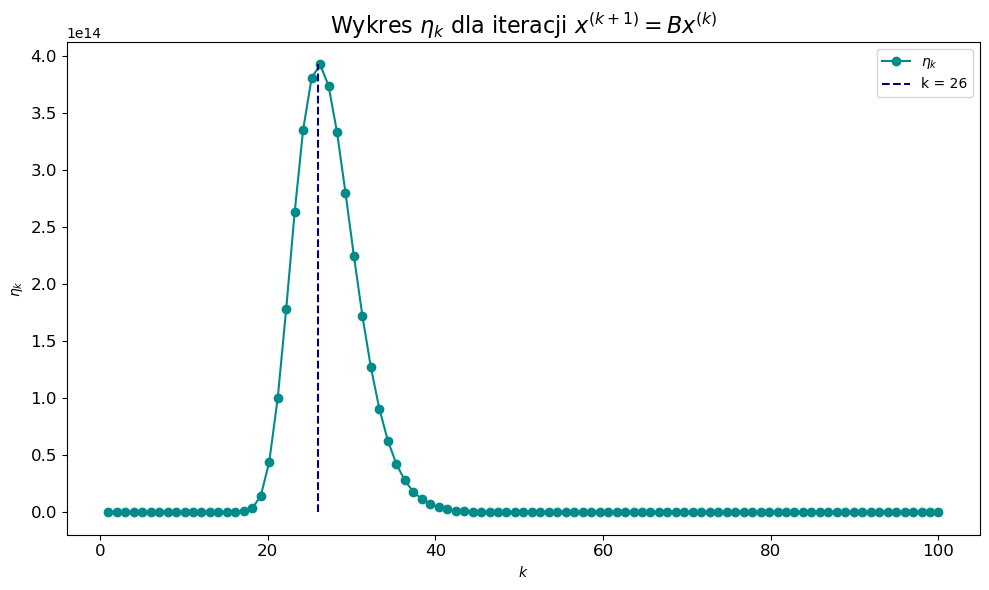

In [117]:
import matplotlib.pyplot as plt

ks = np.linspace(1,k+1,k)
plt.figure(figsize=(10, 6))

plt.plot(ks, etas, marker='o', label=r'$\eta_k$', color="darkcyan")
plt.title(r'Wykres $\eta_k$ dla iteracji $x^{(k+1)} = B x^{(k)}$', fontsize=16)
plt.xlabel("$k$")
plt.ylabel("$\\eta_k$")
plt.vlines(26,0,max(etas),linestyle="--",color="navy", label=f'k = {26}')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()


In [93]:
print(f"Indeks maksimum to: {etas.index(max(etas))+1}, za tym punktem wartości maleją")

for k,eta in enumerate(etas):
    if eta < 1:
        print(f"Najmniejsze szukane k to: {k}")
        break

Indeks maksimum to: 26, za tym punktem wartości maleją
Najmniejsze szukane k to: 86
